<a href="https://colab.research.google.com/github/upendradhamala/CNN-Devanagari-characters/blob/main/46Devanagari_characters_training.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
from tensorflow.keras.models import Model 
from tensorflow.keras.layers import Input,Dense,Dropout 
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten ,BatchNormalization
import cv2
import numpy as np 
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [ ]:


inputs = Input(shape=(32,32,3))
x = Conv2D(filters = 64, kernel_size = 5, activation = 'relu')(inputs)
x = MaxPooling2D()(x)
x = BatchNormalization()(x)
x = Conv2D(filters = 32,        
kernel_size = 3,            
activation = 'relu')(x)  
x = MaxPooling2D()(x) 

x=Dropout(0.2)(x)

x = Flatten()(x) 
x=Dense(256,
activation='relu')(x)
x=Dense(128,
activation='relu')(x)
outputs = Dense(46, activation = 'softmax')(x) 
 
model = Model(inputs = inputs, outputs = outputs) 
 
model.summary() 
 

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)         

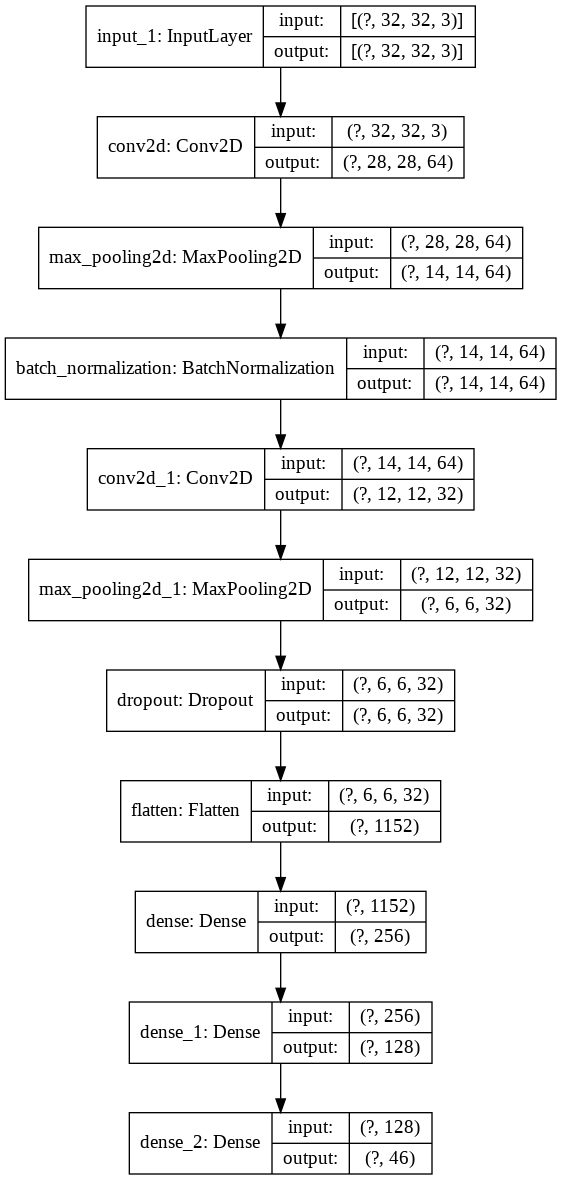

In [ ]:
from keras.utils.vis_utils import plot_model
plot_model(model,  show_shapes=True, show_layer_names=True)

In [ ]:
from tensorflow.keras.utils import plot_model 
model.compile(
	optimizer='adam', 
	loss='categorical_crossentropy', 
	metrics=['accuracy']) 
data_gen_train = ImageDataGenerator(rescale=1/255)



data_gen_valid = ImageDataGenerator(rescale=1/255)

train_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/train_dataset/training_dataset1", target_size=(32,32), batch_size=30)

valid_generator = data_gen_valid.flow_from_directory(directory=r"./drive/My Drive/validation_dataset/validation_dataset1", target_size=(32,32), batch_size=15)
 

history=model.fit(
	train_generator,
	epochs =50, 
	steps_per_epoch=1699,
	validation_steps=1147,
	validation_data=valid_generator
	) 




Found 50992 images belonging to 46 classes.
Found 17218 images belonging to 46 classes.
Epoch 1/50
1699/1699 [==============================] - 13699s 8s/step - loss: 0.5779 - accuracy: 0.8346 - val_loss: 0.2195 - val_accuracy: 0.9326
Epoch 2/50
1699/1699 [==============================] - 82s 48ms/step - loss: 0.1747 - accuracy: 0.9465 - val_loss: 0.3523 - val_accuracy: 0.9036
Epoch 3/50
1699/1699 [==============================] - 78s 46ms/step - loss: 0.1227 - accuracy: 0.9617 - val_loss: 0.1649 - val_accuracy: 0.9538
Epoch 4/50
1699/1699 [==============================] - 76s 45ms/step - loss: 0.1007 - accuracy: 0.9685 - val_loss: 0.1479 - val_accuracy: 0.9578
Epoch 5/50
1699/1699 [==============================] - 74s 44ms/step - loss: 0.0886 - accuracy: 0.9719 - val_loss: 0.1164 - val_accuracy: 0.9688
Epoch 6/50
1699/1699 [==============================] - 74s 44ms/step - loss: 0.0772 - accuracy: 0.9764 - val_loss: 0.1361 - val_accuracy: 0.9641
Epoch 7/50
1699/1699 [=============

OSError: ignored

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
#this code is for predicting a single character image.
def prediction(x): 

  switcher = { 
     
      0:'क',
      1:'क्ष',
      2:'ख',
      3:'ग',
      4:'घ',
      5:'ङ',
      6:'च',
      7:'छ',
      8:'ज',
      9:'ज्ञ',
      10:'झ',
      11:'ञ',
      12:'ट',
      13:'ठ',
      14:'ड',
      15:'ढ',
      16:'ण',
      17:'त',
      18:'त्र',
      19:'थ',
      20:'द',
      21:'ध',
      22:'न',
      23:'प',
      24:'फ',
      25:'ब',
      26:'भ',
      27:'म',
      28:'य',
      29:'र',
      30:'ल',
      31:'व',
      32:'श',
      33:'ष',
      34:'स',
      35:'ह',
      36:'०',
      37:'१',
      38:'२',
      39:'३',
      40:'४',
      41:'५',
      42:'६',
      43:'७',
      44:'८',
      45:'९'
      
     
  }

  return switcher.get(x) 


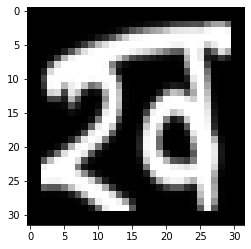

In [ ]:
import matplotlib.pyplot as plt 
import numpy as np 
import cv2 
#Image to predict to out model 

img = cv2.imread(r"./drive/My Drive/test_dataset/प/1654.png",3) 
#/content/drive/My Drive/test_dataset/characters/65238.png
plt.imshow(img) 

In [ ]:
img = np.expand_dims(img, axis= 0) 
img = np.expand_dims(img, axis = -1) 
pred = model.predict(img) 
print(pred)
print("The predicted character is:", prediction(np.argmax(pred))) 

[[0. 0. 1. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
  0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.]]
The predicted character is: ख


In [ ]:
#this is for reloading the saved trained model.
import tensorflow.keras
model = tensorflow.keras.models.load_model('drive/My Drive/fully_trained.h5')
print(model)
model.summary()

Model: "functional_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 32, 32, 3)]       0         
_________________________________________________________________
conv2d (Conv2D)              (None, 28, 28, 64)        4864      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 14, 14, 64)        0         
_________________________________________________________________
batch_normalization (BatchNo (None, 14, 14, 64)        256       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 12, 12, 32)        18464     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 6, 6, 32)          0         
_________________________________________________________________
dropout (Dropout)            (None, 6, 6, 32)         

In [ ]:
# list all data in history
print(history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


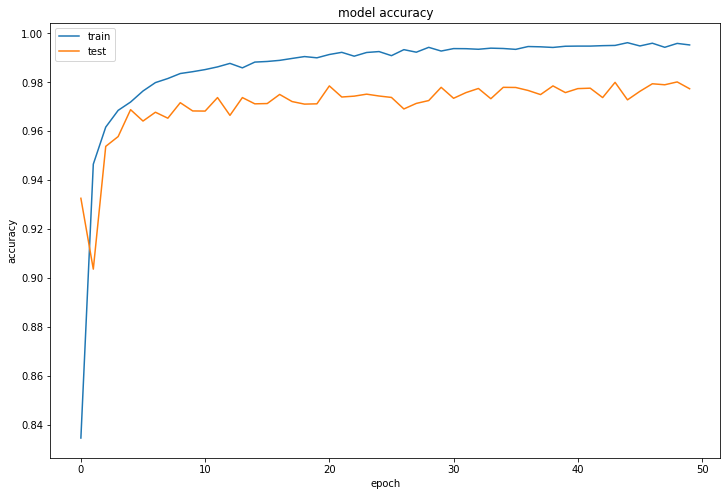

In [ ]:

# summarize history for accuracy
import matplotlib.pyplot as plt
plt.figure(figsize=(12,8))
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

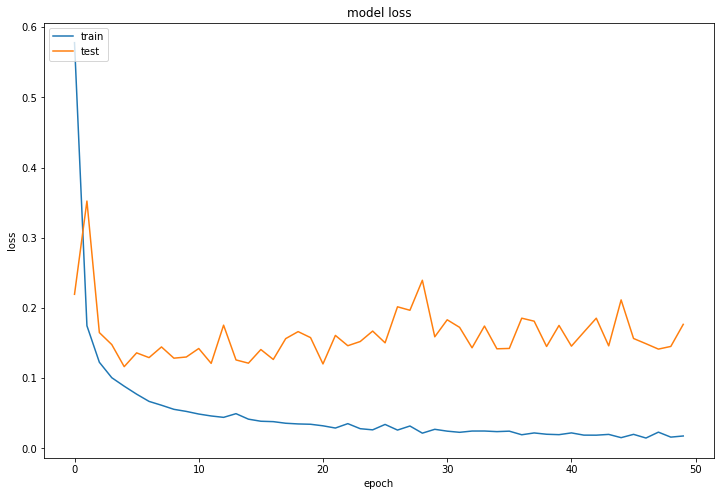

In [ ]:
# summarize history for loss
plt.figure(figsize=(12,8))
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [ ]:
a=valid_generator.class_indices
print('Validation data classes')
print(a)
b=train_generator.class_indices
print('--------------------------------------------------------------------------------------------------------------------------------------')
print('Training data classes')
print(b)

Validation data classes
{'क': 0, 'क्ष': 1, 'ख': 2, 'ग': 3, 'घ': 4, 'ङ': 5, 'च': 6, 'छ': 7, 'ज': 8, 'ज्ञ': 9, 'झ': 10, 'ञ': 11, 'ट': 12, 'ठ': 13, 'ड': 14, 'ढ': 15, 'ण': 16, 'त': 17, 'त्र': 18, 'थ': 19, 'द': 20, 'ध': 21, 'न': 22, 'प': 23, 'फ': 24, 'ब': 25, 'भ': 26, 'म': 27, 'य': 28, 'र': 29, 'ल': 30, 'व': 31, 'श': 32, 'ष': 33, 'स': 34, 'ह': 35, '०': 36, '१': 37, '२': 38, '३': 39, '४': 40, '५': 41, '६': 42, '७': 43, '८': 44, '९': 45}
--------------------------------------------------------------------------------------------------------------------------------------
Training data classes
{'क': 0, 'क्ष': 1, 'ख': 2, 'ग': 3, 'घ': 4, 'ङ': 5, 'च': 6, 'छ': 7, 'ज': 8, 'ज्ञ': 9, 'झ': 10, 'ञ': 11, 'ट': 12, 'ठ': 13, 'ड': 14, 'ढ': 15, 'ण': 16, 'त': 17, 'त्र': 18, 'थ': 19, 'द': 20, 'ध': 21, 'न': 22, 'प': 23, 'फ': 24, 'ब': 25, 'भ': 26, 'म': 27, 'य': 28, 'र': 29, 'ल': 30, 'व': 31, 'श': 32, 'ष': 33, 'स': 34, 'ह': 35, '०': 36, '१': 37, '२': 38, '३': 39, '४': 40, '५': 41, '६': 42, '७': 43, '८': 44, '९': 4

In [ ]:
data_gen_train = ImageDataGenerator(rescale=1/255)
test_generator = data_gen_train.flow_from_directory(directory=r"./drive/My Drive/test_dataset", target_size=(32,32), batch_size=13,shuffle=False)



Found 18694 images belonging to 46 classes.


In [ ]:

test_generator.reset()
pred=model.predict(test_generator,
steps=1438,
verbose=1)

1438/1438 [==============================] - 6194s 4s/step


In [ ]:
predicted_class_indices=np.argmax(pred,axis=1)
print(predicted_class_indices)

[ 0  0  0 ... 45 45 45]


In [ ]:
labels = (test_generator.class_indices)
print(labels)
labels = dict((v,k) for k,v in labels.items())
predictions = [labels[k] for k in predicted_class_indices]
print(labels)

{'क': 0, 'क्ष': 1, 'ख': 2, 'ग': 3, 'घ': 4, 'ङ': 5, 'च': 6, 'छ': 7, 'ज': 8, 'ज्ञ': 9, 'झ': 10, 'ञ': 11, 'ट': 12, 'ठ': 13, 'ड': 14, 'ढ': 15, 'ण': 16, 'त': 17, 'त्र': 18, 'थ': 19, 'द': 20, 'ध': 21, 'न': 22, 'प': 23, 'फ': 24, 'ब': 25, 'भ': 26, 'म': 27, 'य': 28, 'र': 29, 'ल': 30, 'व': 31, 'श': 32, 'ष': 33, 'स': 34, 'ह': 35, '०': 36, '१': 37, '२': 38, '३': 39, '४': 40, '५': 41, '६': 42, '७': 43, '८': 44, '९': 45}
{0: 'क', 1: 'क्ष', 2: 'ख', 3: 'ग', 4: 'घ', 5: 'ङ', 6: 'च', 7: 'छ', 8: 'ज', 9: 'ज्ञ', 10: 'झ', 11: 'ञ', 12: 'ट', 13: 'ठ', 14: 'ड', 15: 'ढ', 16: 'ण', 17: 'त', 18: 'त्र', 19: 'थ', 20: 'द', 21: 'ध', 22: 'न', 23: 'प', 24: 'फ', 25: 'ब', 26: 'भ', 27: 'म', 28: 'य', 29: 'र', 30: 'ल', 31: 'व', 32: 'श', 33: 'ष', 34: 'स', 35: 'ह', 36: '०', 37: '१', 38: '२', 39: '३', 40: '४', 41: '५', 42: '६', 43: '७', 44: '८', 45: '९'}


In [ ]:
from sklearn.metrics import confusion_matrix
from matplotlib import pyplot as plt

cm = confusion_matrix(test_generator.classes,predicted_class_indices) 
#print(cm)
total=np.sum(cm,axis=1)
#print(total)
cm=np.round(cm/total,2)
print(cm)

[[1.   0.   0.   ... 0.   0.   0.  ]
 [0.   0.99 0.   ... 0.   0.   0.  ]
 [0.   0.   1.   ... 0.   0.   0.  ]
 ...
 [0.   0.   0.   ... 0.98 0.   0.  ]
 [0.   0.   0.   ... 0.   1.   0.  ]
 [0.   0.   0.   ... 0.   0.   0.99]]


In [ ]:
!wget "https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip"


--2020-10-14 06:08:46--  https://noto-website-2.storage.googleapis.com/pkgs/NotoSansDevanagari-hinted.zip
Resolving noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)... 142.250.99.128, 2607:f8b0:400e:c0c::80
Connecting to noto-website-2.storage.googleapis.com (noto-website-2.storage.googleapis.com)|142.250.99.128|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 6201435 (5.9M) [application/zip]
Saving to: ‘NotoSansDevanagari-hinted.zip’

NotoSansDevanagari- 100%[===================>]   5.91M  --.-KB/s    in 0.1s    

2020-10-14 06:08:46 (42.9 MB/s) - ‘NotoSansDevanagari-hinted.zip’ saved [6201435/6201435]



In [ ]:
!wget "https://dl.1001fonts.com/ananda-akchyar.zip"

--2020-10-14 07:02:27--  https://dl.1001fonts.com/ananda-akchyar.zip
Resolving dl.1001fonts.com (dl.1001fonts.com)... 5.35.250.80
Connecting to dl.1001fonts.com (dl.1001fonts.com)|5.35.250.80|:443... connected.
HTTP request sent, awaiting response... 302 Moved Temporarily
Location: https://dl.static.1001fonts.net/niceid/a/n/ananda-akchyar.zip [following]
--2020-10-14 07:02:28--  https://dl.static.1001fonts.net/niceid/a/n/ananda-akchyar.zip
Resolving dl.static.1001fonts.net (dl.static.1001fonts.net)... 5.35.250.80
Connecting to dl.static.1001fonts.net (dl.static.1001fonts.net)|5.35.250.80|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 112621 (110K) [application/zip]
Saving to: ‘ananda-akchyar.zip’

ananda-akchyar.zip  100%[===================>] 109.98K   386KB/s    in 0.3s    

2020-10-14 07:02:29 (386 KB/s) - ‘ananda-akchyar.zip’ saved [112621/112621]



In [ ]:
!unzip "ananda-akchyar.zip"


Archive:  ananda-akchyar.zip
This font was downloaded from 1001fonts.com
  inflating: Ananda Akchyar bold.ttf  
  inflating: Ananda Akchyar.ttf      
  inflating: 1001fonts-ananda-akchyar-eula.txt  


In [ ]:
!mv NotoSansDevanagariUI-Regular.ttf /usr/share/fonts/truetype/

In [ ]:
import matplotlib.font_manager as fm

# fetch the name of font that was installed
path = '/usr/share/fonts/truetype/NotoSansDevanagariUI-Regular.ttf'
fontprop = fm.FontProperties(fname=path)
print(fontprop)

sans\-serif:style=normal:variant=normal:weight=normal:stretch=normal:file=/usr/share/fonts/truetype/NotoSansDevanagariUI-Regular.ttf:size=10.0


/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 108 missing from current font.
  font.set_text(s, 0.0, flags=flags)
/usr/local/lib/python3.6/dist-packages/matplotlib/backends/backend_agg.py:214: RuntimeWarning: Glyph 112 missing from current font.
  font.set_text(s, 0.0, flags=flags)


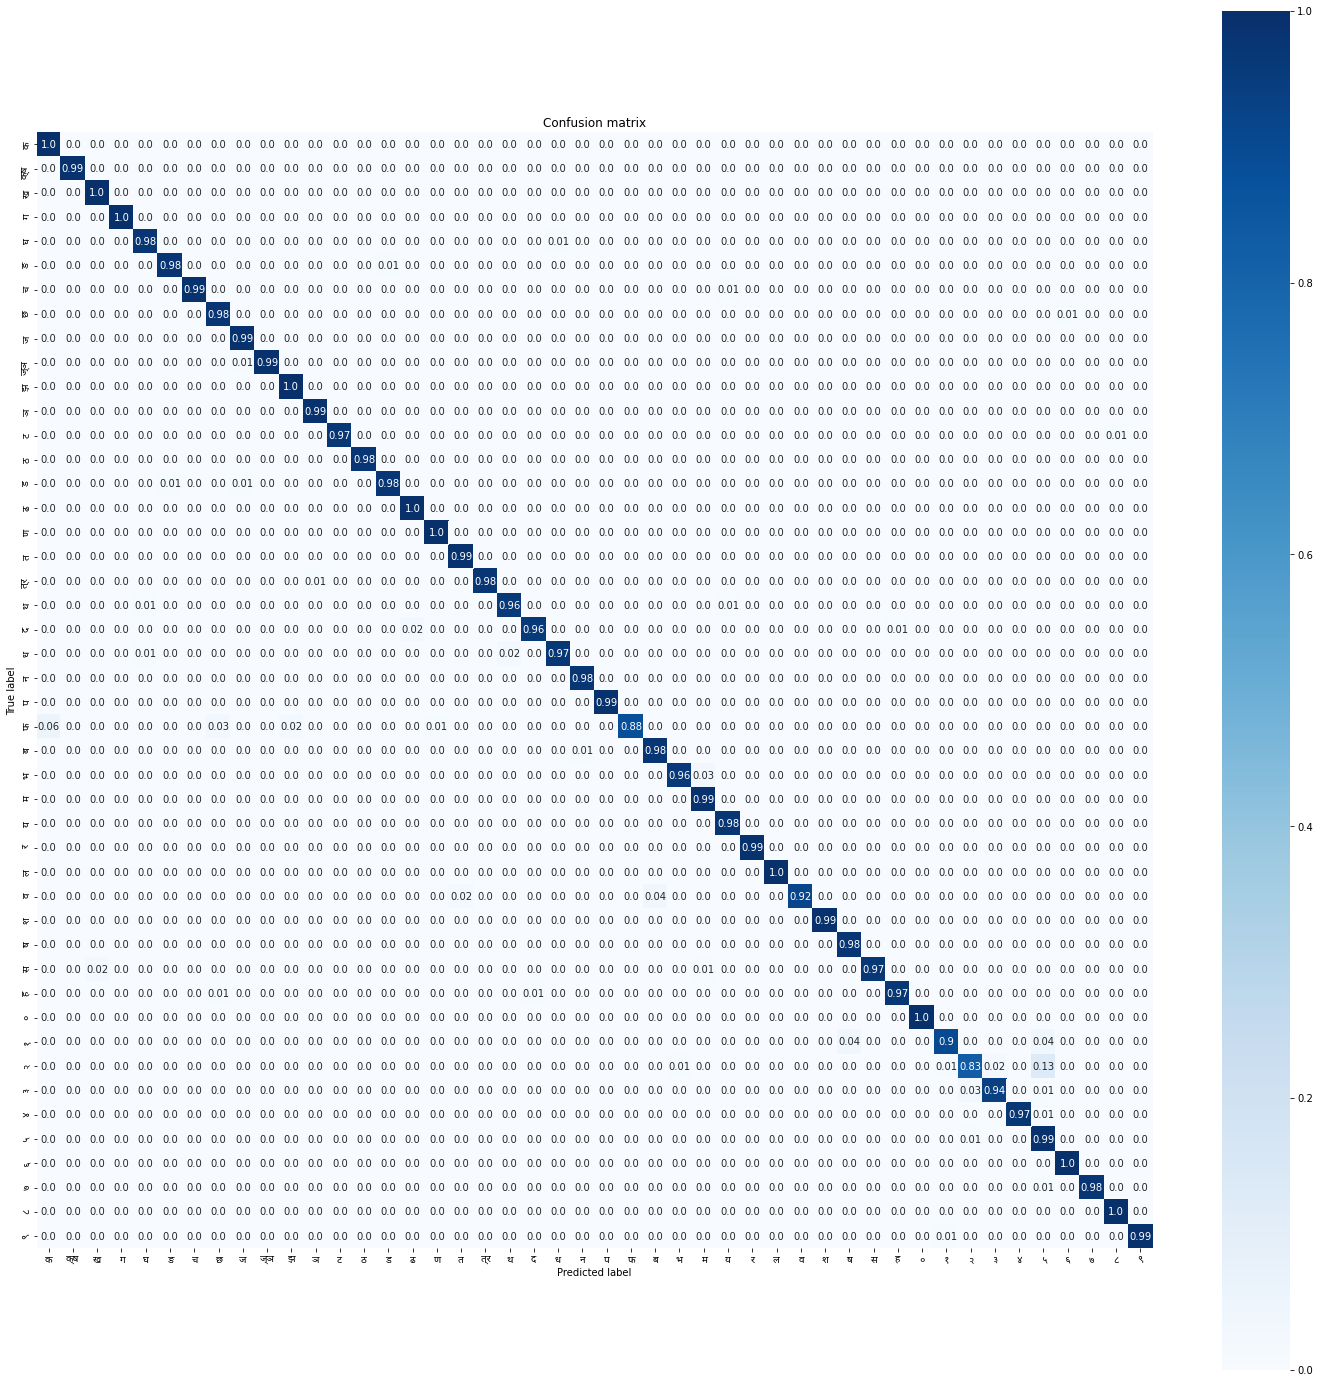

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

class_names=['क','क्ष', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'ज्ञ', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'त्र', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']
fig, ax = plt.subplots(figsize=(25,25))
ax = sns.heatmap(cm,annot=True,square= True,fmt ='',cbar = True ,cmap='Blues')
ax.xaxis.set_ticklabels(class_names,fontproperties=fontprop)
ax.yaxis.set_ticklabels(class_names,fontproperties=fontprop)
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion matrix')
plt.show()


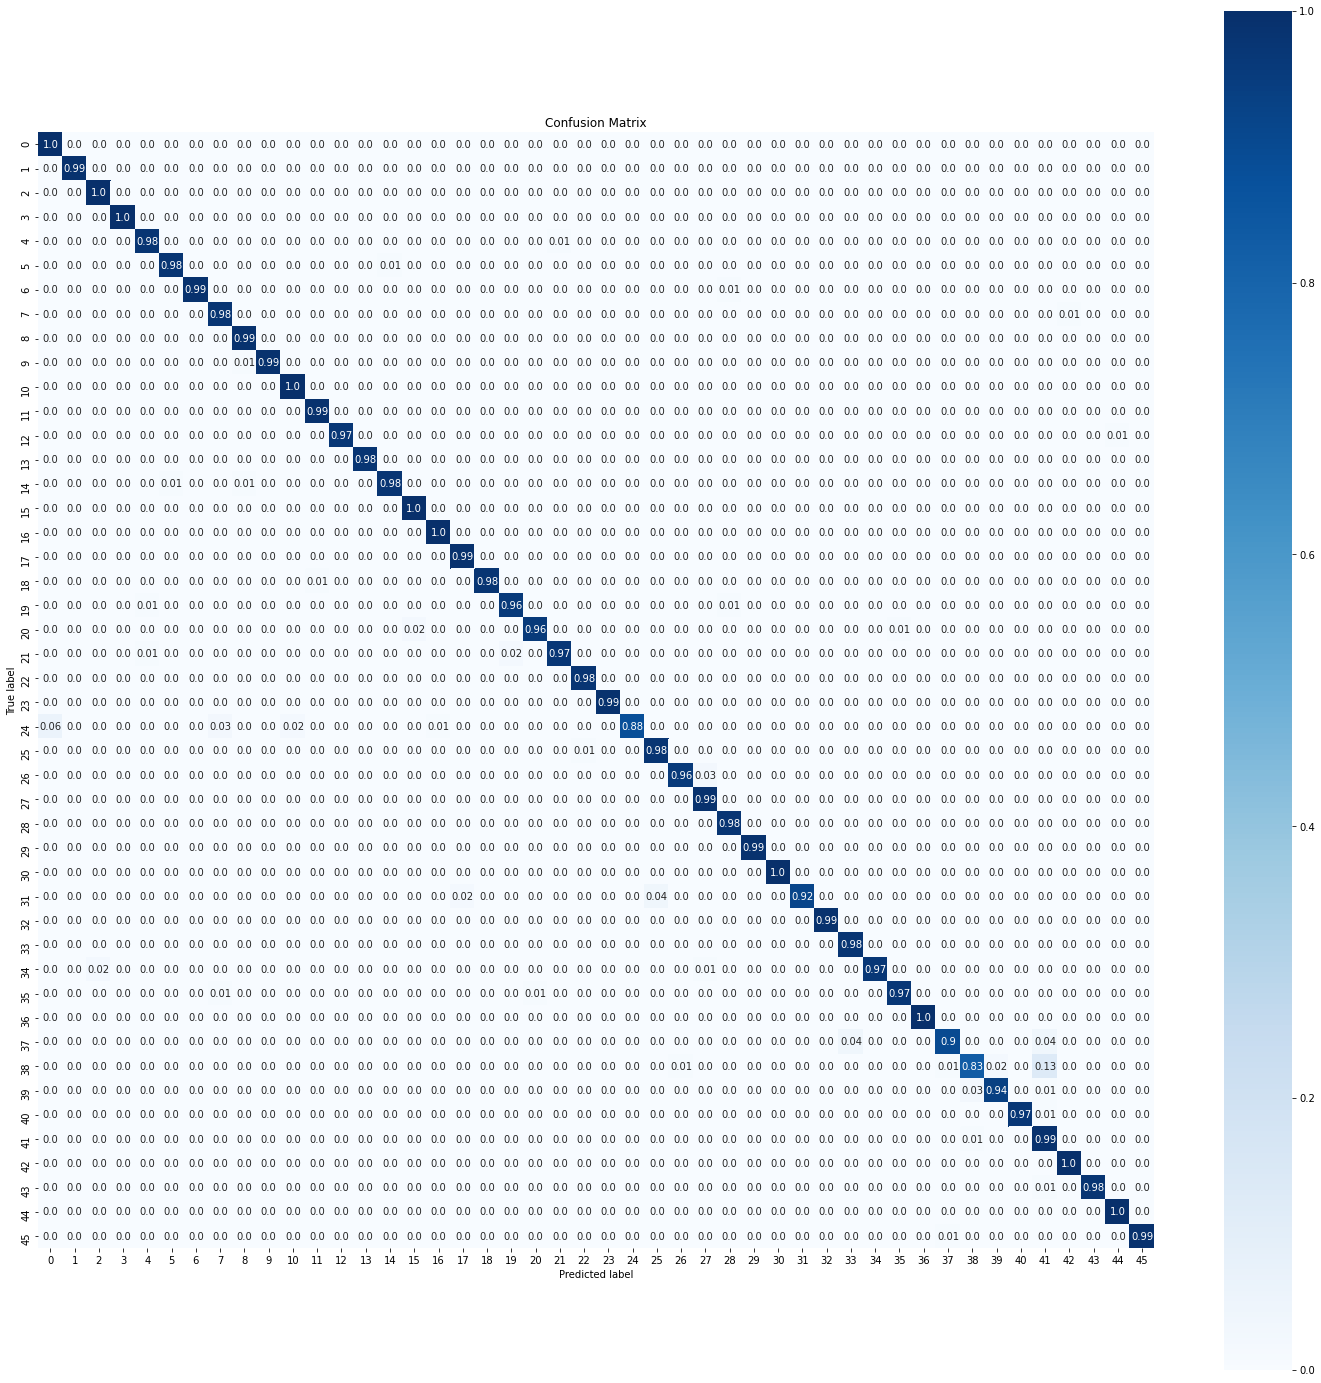

In [ ]:
import seaborn as sns
from matplotlib import pyplot as plt

fig, ax = plt.subplots(figsize=(25,25))
sns.heatmap(cm,annot=True,square= True,fmt ='',cbar = True,cmap='Blues')
plt.ylabel('True label')
plt.xlabel('Predicted label')
plt.title('Confusion Matrix')
plt.show()

In [ ]:
#importing accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
print('\nAccuracy: {:.2f}\n'.format(accuracy_score(test_generator.classes,predicted_class_indices)))

print('Micro Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='micro')))
print('Micro Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='micro')))
print('Micro F1-score: {:.2f}\n'.format(f1_score(test_generator.classes,predicted_class_indices, average='micro')))

print('Macro Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='macro')))
print('Macro Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='macro')))
print('Macro F1-score: {:.2f}\n'.format(f1_score(test_generator.classes,predicted_class_indices, average='macro')))

print('Weighted Precision: {:.2f}'.format(precision_score(test_generator.classes,predicted_class_indices, average='weighted')))
print('Weighted Recall: {:.2f}'.format(recall_score(test_generator.classes,predicted_class_indices, average='weighted')))
print('Weighted F1-score: {:.2f}'.format(f1_score(test_generator.classes,predicted_class_indices, average='weighted')))

from sklearn.metrics import classification_report
print('\nClassification Report\n')
print("----------------------------------------------------------")
print(classification_report(test_generator.classes,predicted_class_indices, target_names=['क','क्ष', 'ख', 'ग', 'घ', 'ङ', 'च', 'छ', 'ज', 'ज्ञ', 'झ', 'ञ', 'ट', 'ठ', 'ड', 'ढ', 'ण', 'त', 'त्र', 'थ', 'द', 'ध', 'न', 'प', 'फ', 'ब', 'भ', 'म', 'य', 'र', 'ल', 'व', 'श', 'ष', 'स', 'ह', '०', '१', '२', '३', '४', '५', '६', '७', '८', '९']))


Accuracy: 0.97

Micro Precision: 0.97
Micro Recall: 0.97
Micro F1-score: 0.97

Macro Precision: 0.97
Macro Recall: 0.97
Macro F1-score: 0.97

Weighted Precision: 0.97
Weighted Recall: 0.97
Weighted F1-score: 0.97

Classification Report

----------------------------------------------------------
              precision    recall  f1-score   support

           क       0.95      0.99      0.97       400
         क्ष       0.99      0.99      0.99       400
           ख       0.98      1.00      0.99       400
           ग       0.99      1.00      0.99       400
           घ       0.97      0.98      0.98       400
           ङ       0.99      0.98      0.98       400
           च       0.99      0.99      0.99       400
           छ       0.96      0.97      0.97       400
           ज       0.98      0.99      0.99       400
         ज्ञ       0.98      0.99      0.98       400
           झ       0.98      1.00      0.99       400
           ञ       0.98      0.99      0.99       400
